# House Prices: Advanced Regression Techniques

## Inleiding
In dit notebook zal worden onderzocht of er verbanden bestaan tussen de prijs van een huis en enkele kenmerken (oppervlakte, wijk, bouwjaar). Om dit te onderzoeken zijn er twee hypotheses opgesteld:

* De grootte van het huis en de wijk waarin het huis plaatsvindt hebben positieve invloed op de verkoopprijs. Hoe groter hoe duurder in specifieke wijken.
* Het bouwjaar van het huis en de wijk waarin het huis plaatsvindt hebben positieve invloed op de verkoopprijs. Hoe nieuwer hoe duurder in specifieke wijken.

## Dataset
De data die wordt gebruikt is afkomstig van de Kaggle.com competitie [House Prices: Advanced Regression Techniques.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

De data beschrijft 79 variabelen van (bijna) elk aspect omtrent een woonhuis in Aimes, Iowa (Verenigde Staten).

# Uitwerking
Om te beginnen zal de data worden ingeladen en worden schoongemaakt, zodat de gewenste gegevens overblijven.

In [139]:
#Libraries inladen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab 
import scipy.stats as stats
#Seaboorn waarschuwingen onderdrukken
import warnings
warnings.filterwarnings('ignore')
#Matplotlib grafieken in het notebook weergeven
%matplotlib inline

In [140]:
#Data inladen
df_train = pd.read_csv('train.csv')

In [141]:
#Kolommen bekijken
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [142]:
#Eerste 5 rijen bekijken ter controle
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [143]:
#Laatste 5 rijen bekijken ter controle
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [144]:
#Datatypes van de kolommen bekijken
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


# Variabelen
De variabelen die nodig zijn:
* *SalePrice* (numriek)
* *LotArea* (numeriek)
* *Neighborhood* (categorie)
* *YearBuilt* (numeriek in de data maar wordt gezien als categorie)



# Missende waarden
Hier wordt bekeken of er ontbrekende waarden zijn in de benodigde data.

In [145]:
missende_data = df_train.isnull().sum().sort_values(ascending=False)
missende_data

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [146]:
#Variabelen bekijken
print(missende_data.loc['SalePrice'])
print(missende_data.loc['LotArea'])
print(missende_data.loc['Neighborhood'])
print(missende_data.loc['YearBuilt'])

0
0
0
0


Uit bovenstaande resultaten is te halen dat er geen missende waarden zijn in de benodigde data en er dus geen verdere stappen uitgevoerd hoeven te worden.

# Data Analyse
Nu we het een en ander van de data weten kunnen we de gewenste infomatie verzamelen en verder analyseren

In [147]:
#Data selecteren
df_train = df_train[['Id', 'SalePrice', 'LotArea', 'Neighborhood', 'YearBuilt']]
#Controleren
df_train.head()

,Id,SalePrice,LotArea,Neighborhood,YearBuilt
0,1,208500,8450,CollgCr,2003
1,2,181500,9600,Veenker,1976
2,3,223500,11250,CollgCr,2001
3,4,140000,9550,Crawfor,1915
4,5,250000,14260,NoRidge,2000


## Correlatie

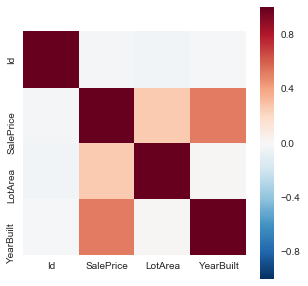

In [148]:
#Correlatie matrix visualiseren
correlatie_matrix = df_train.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(correlatie_matrix, vmax=1.0, square=True)

## SalePrice
De belangrijkste variabele is *SalePrice*. Zoals de naam al aangeeft is dit de prijs waarvoor het huis verkocht is.

*SalePrice* en de mogelijke relaties met andere variabelen zullen hieronder verder bekenen worden.

In [149]:
#Enkele statistieken van SalePrice bekijken
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

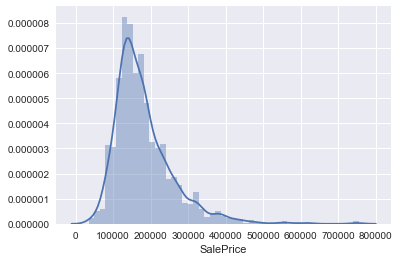

In [150]:
#SalePrice plotten in een histogram
sns.distplot(df_train['SalePrice'])

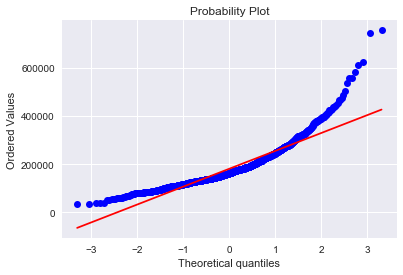

In [151]:
figure = plt.figure()
graph = stats.probplot(df_train['SalePrice'], plot=plt)

In bovenstaande figuren is te zien dat er geen sprake is van een normaalverdeling. Dit is te snel te zien aan de datapunten die de rechte lijn niet volgen.



### Numerieke waarden

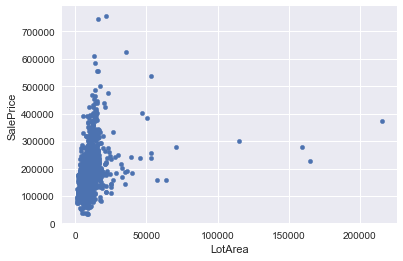

In [152]:
#Scatter plot van LotArea tegen SalePrice
df_scatter = pd.concat([df_train['SalePrice'], df_train['LotArea']], axis=1)
df_scatter.plot.scatter(x='LotArea', y='SalePrice')

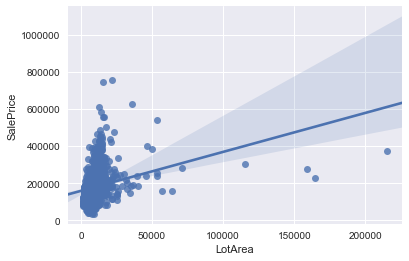

In [153]:
#Regressie plot van LotArea tegen SalePrice
sns.regplot(x='LotArea', y='SalePrice', data=df_scatter)

In bovenstaande scatter en regressie plots is te zien dat de meeste datapunten zich in een cluster bevinden. Er zijn enkele flinke outliars te constateren. Mogelijke verklaringen voor deze outliars kunnen zijn:
* Het stuk grond is van ondermaatse kwaliteit.
* De ligging van het stuk grond is niet gunstig voor de verkoop.
* Landbouwgrond.
* Mogelijk sprake van een faillissement verkoop.

Het zou interessant kunnen zijn wat er met het regressie plot gebeurt als de grootste outliars uit de data worden gehaald.

In [154]:
#Grootste 4 outliars opzoeken
df_outliars_dropped = df_train.sort_values(by='LotArea', ascending=False)
df_outliars_dropped[:4]

,Id,SalePrice,LotArea,Neighborhood,YearBuilt
313,314,375000,215245,Timber,1965
335,336,228950,164660,Timber,1965
249,250,277000,159000,ClearCr,1958
706,707,302000,115149,ClearCr,1971


In [155]:
#Grootste 4 outliars verwijderen
df_outliars_dropped = df_outliars_dropped.drop(df_outliars_dropped[df_outliars_dropped['Id'] == 314].index)
df_outliars_dropped = df_outliars_dropped.drop(df_outliars_dropped[df_outliars_dropped['Id'] == 336].index)
df_outliars_dropped = df_outliars_dropped.drop(df_outliars_dropped[df_outliars_dropped['Id'] == 250].index)
df_outliars_dropped = df_outliars_dropped.drop(df_outliars_dropped[df_outliars_dropped['Id'] == 707].index)
df_outliars_dropped[:4]

,Id,SalePrice,LotArea,Neighborhood,YearBuilt
451,452,280000,70761,ClearCr,1975
1298,1299,160000,63887,Edwards,2008
1396,1397,160000,57200,Timber,1948
769,770,538000,53504,StoneBr,2003


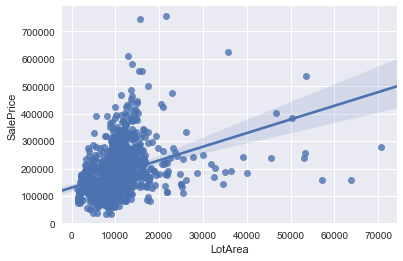

In [156]:
#Regressie plot van LotArea tegen SalePrice zonder outliars
sns.regplot(x='LotArea', y='SalePrice', data=df_outliars_dropped)

Zoals hierboven te zien is, is er nog steeds sprake van flinke spreiding. Nog meer datapunten verwijderen is nu niet meer gewenst om de integriteit van de data te bewaren.

### Categoriale waarden

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

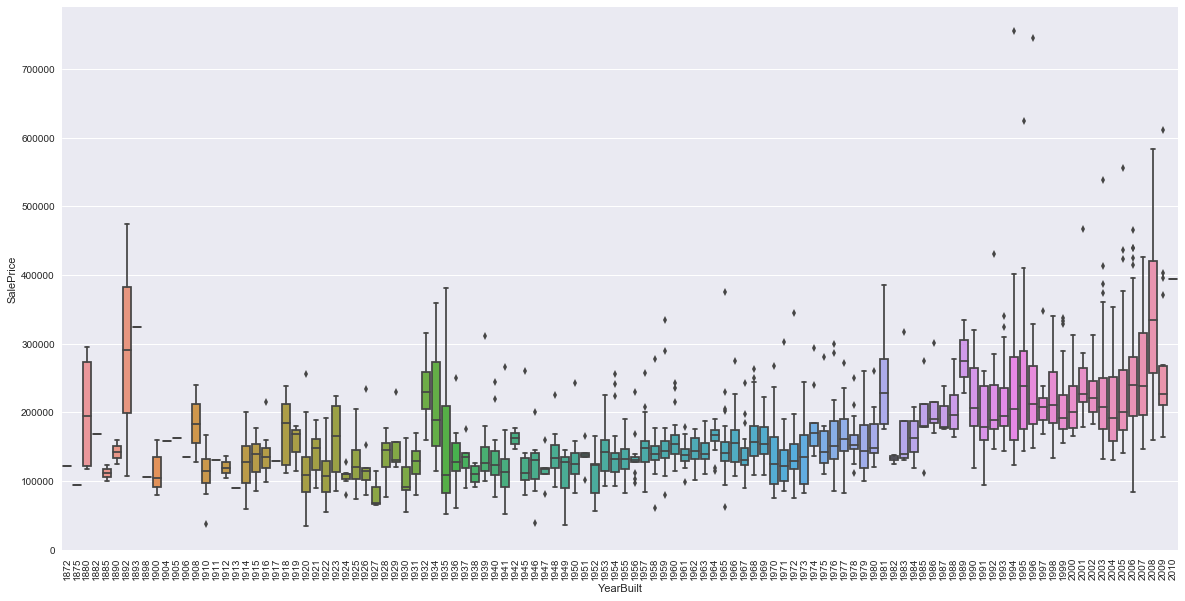

In [157]:
#Box plot van YearBuilt tegen SalePrice
df_box = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
plt.subplots(figsize=(20, 10))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df_box)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

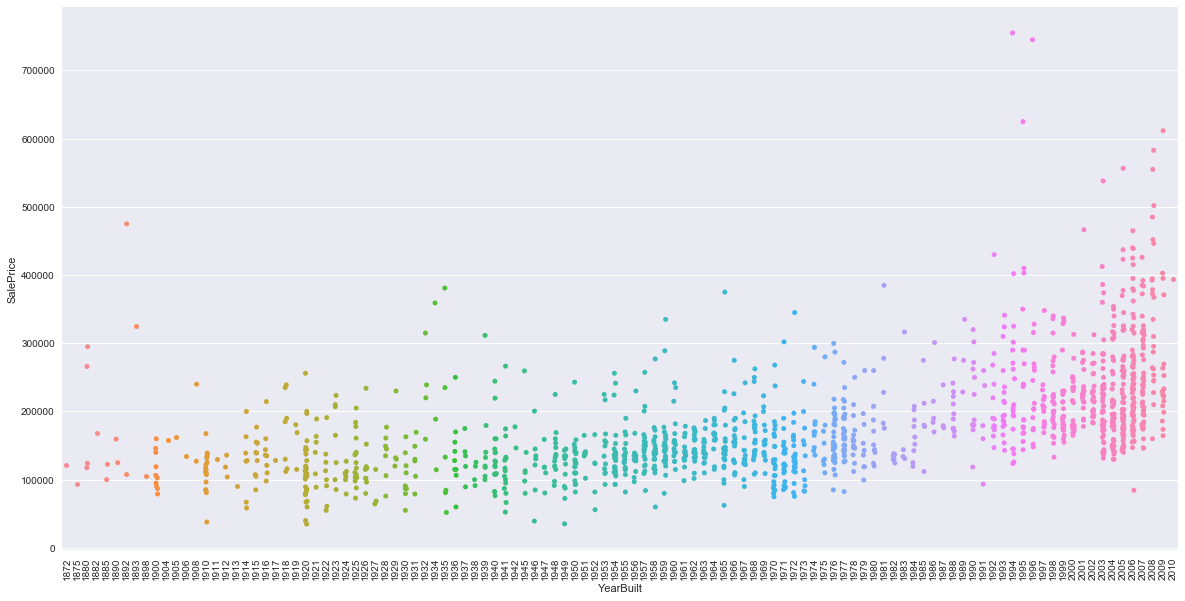

In [158]:
plt.subplots(figsize=(20, 10))
sns.stripplot(x='YearBuilt', y='SalePrice', data=df_box, jitter=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

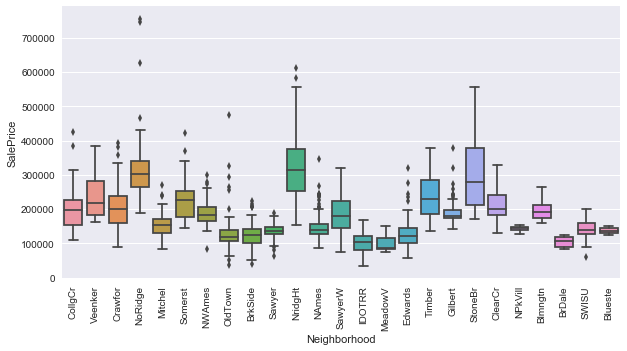

In [159]:
#Box plot van Neighborhood tegen SalePrice
df_box = pd.concat([df_train['SalePrice'], df_train['Neighborhood']], axis=1)
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_box)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

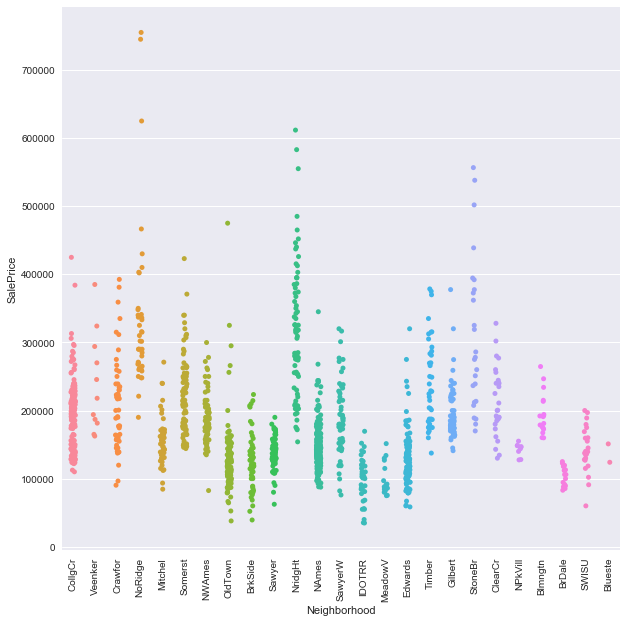

In [160]:
plt.subplots(figsize=(10, 10))
sns.stripplot(x='Neighborhood', y='SalePrice', data=df_box, jitter=True)
plt.xticks(rotation=90)

# FAHIM'S UITWERKING BELOW

In [161]:
df_train.sort_values('SalePrice',ascending=False , inplace=True)
df_train

,Id,SalePrice,LotArea,Neighborhood,YearBuilt
691,692,755000,21535,NoRidge,1994
1182,1183,745000,15623,NoRidge,1996
1169,1170,625000,35760,NoRidge,1995
898,899,611657,12919,NridgHt,2009
803,804,582933,13891,NridgHt,2008
1046,1047,556581,16056,StoneBr,2005
440,441,555000,15431,NridgHt,2008
769,770,538000,53504,StoneBr,2003
178,179,501837,17423,StoneBr,2008
798,799,485000,13518,NridgHt,2008


In [162]:
df = df_train[['Id','LotArea','Neighborhood','YearBuilt','SalePrice']]

In [163]:
df.sort_values('SalePrice',ascending=False , inplace=True)

### De top10 dure huizen

In [164]:
dfTop10= df.iloc[0:10]
dfTop10

,Id,LotArea,Neighborhood,YearBuilt,SalePrice
691,692,21535,NoRidge,1994,755000
1182,1183,15623,NoRidge,1996,745000
1169,1170,35760,NoRidge,1995,625000
898,899,12919,NridgHt,2009,611657
803,804,13891,NridgHt,2008,582933
1046,1047,16056,StoneBr,2005,556581
440,441,15431,NridgHt,2008,555000
769,770,53504,StoneBr,2003,538000
178,179,17423,StoneBr,2008,501837
798,799,13518,NridgHt,2008,485000


### Een grafisch overzicht van de verkoopprijs. Uit de grafiek blijkt de verkoopprijs normal verdeeld is. 

(array([   7.,   15.,   53.,   73.,  153.,  227.,  188.,  155.,  141.,
          88.,   78.,   66.,   44.,   42.,   20.,   29.,   20.,    8.,
          10.,   13.,    7.,    5.,    4.,    3.,    1.,    2.,    0.,
           1.,    2.,    0.,    1.,    0.,    2.,    0.,    0.,    0.,
           0.,    0.,    0.,    2.]),
 array([  34900. ,   52902.5,   70905. ,   88907.5,  106910. ,  124912.5,
         142915. ,  160917.5,  178920. ,  196922.5,  214925. ,  232927.5,
         250930. ,  268932.5,  286935. ,  304937.5,  322940. ,  340942.5,
         358945. ,  376947.5,  394950. ,  412952.5,  430955. ,  448957.5,
         466960. ,  484962.5,  502965. ,  520967.5,  538970. ,  556972.5,
         574975. ,  592977.5,  610980. ,  628982.5,  646985. ,  664987.5,
         682990. ,  700992.5,  718995. ,  736997.5,  755000. ]),
 <a list of 40 Patch objects>)

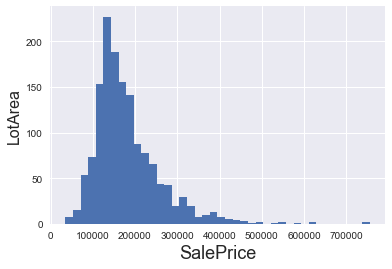

In [165]:
plt.xlabel('SalePrice', fontsize=18)
plt.ylabel('LotArea', fontsize=16)
plt.hist(df['SalePrice'], 40)

### Grafiek van de ontwikkeling van de verkoopprijs in vergelijking met de grootte van het huis

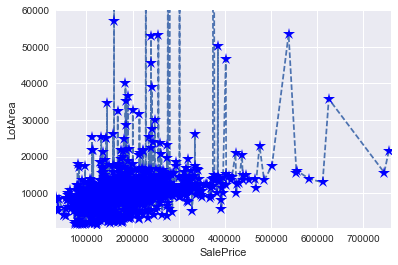

In [166]:
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.xlim(35000,760000)
plt.ylim(500,60000)
plt.plot(df['SalePrice'],df['LotArea'], linestyle='--',
        marker='*', markerfacecolor='blue', markersize=12)

In [167]:
df_train.shape

(1460, 5)

In [168]:
df.shape

(1460, 5)

In [169]:
df.dtypes

Id               int64
LotArea          int64
Neighborhood    object
YearBuilt        int64
SalePrice        int64
dtype: object

In [170]:
df_train.describe()

,Id,SalePrice,LotArea,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,180921.195890,10516.828082,1971.267808
std,421.610009,79442.502883,9981.264932,30.202904
min,1.000000,34900.000000,1300.000000,1872.000000
25%,365.750000,129975.000000,7553.500000,1954.000000
50%,730.500000,163000.000000,9478.500000,1973.000000
75%,1095.250000,214000.000000,11601.500000,2000.000000
max,1460.000000,755000.000000,215245.000000,2010.000000


In [171]:
df.describe()

,Id,LotArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,1971.267808,180921.195890
std,421.610009,9981.264932,30.202904,79442.502883
min,1.000000,1300.000000,1872.000000,34900.000000
25%,365.750000,7553.500000,1954.000000,129975.000000
50%,730.500000,9478.500000,1973.000000,163000.000000
75%,1095.250000,11601.500000,2000.000000,214000.000000
max,1460.000000,215245.000000,2010.000000,755000.000000


In [172]:
df['Id'] = df['Id'].astype('category')

In [173]:
df.describe()

,LotArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,180921.195890
std,9981.264932,30.202904,79442.502883
min,1300.000000,1872.000000,34900.000000
25%,7553.500000,1954.000000,129975.000000
50%,9478.500000,1973.000000,163000.000000
75%,11601.500000,2000.000000,214000.000000
max,215245.000000,2010.000000,755000.000000


### Dit is een normale verdeling. Een normale verdeling is de (continue) frequentieverdeling die ontstaat bij meetwaarden van stapeling onafhankelijke gebeurtenissen, zoal hier voor SalePrice.

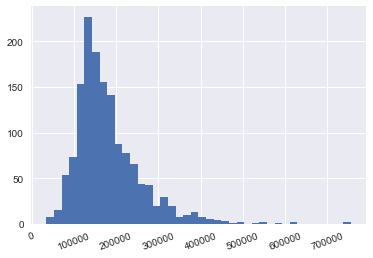

In [174]:
df.SalePrice.hist(bins=40, xrot=20)

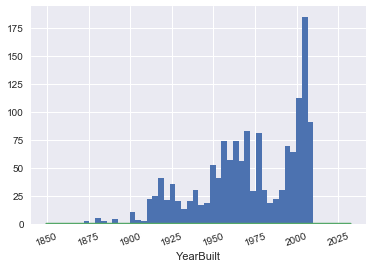

In [175]:
df.YearBuilt.hist(bins=40, xrot=20)
sns.distplot(df.YearBuilt, hist=True)

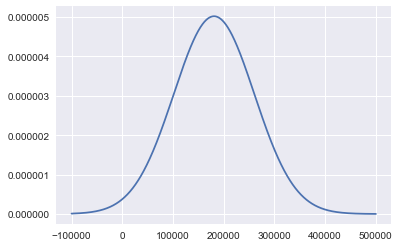

In [176]:
mu_price =df.SalePrice.mean()
sigma_price = df.SalePrice.std()
normal_price = stats.norm(mu_price, sigma_price)

x = np.linspace(-100000,500000, 1000)
y = normal_price.pdf(x)
plt.plot(x,y)
plt.show()

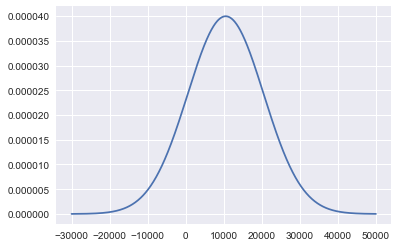

In [177]:
mu_area =df.LotArea.mean()
sigma_area = df.LotArea.std()
normal_area = stats.norm(mu_area, sigma_area)

x = np.linspace(-30000,50000, 1000)
y = normal_area.pdf(x)
plt.plot(x,y)
plt.show()